**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 네비게이션 주행데이터를 읽어들여 데이터를 분석 및 전처리한 후 머신러닝과 딥러닝으로 도착시각을 예측하고 결과를 분석하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [11]:
# !pip uninstall numpy
!pip install numpy==1.23.4

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\hschoi\\Anaconda3\\Lib\\site-packages\\~umpy.libs\\libscipy_openblas64_-caad452230ae4ddb57899b8b3a33c55c.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [1]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

C:\Users\hschoi\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<br>

### 2. Pandas는 데이터 분석을 위해 널리 사용되는 파이썬 라이브러리입니다.
### Pandas를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import pandas as pd

---

In [3]:
qwe = pd.read_csv("churn_data.csv")

In [5]:
qwe.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
qwe['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

---

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* A0007IT.json 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [3]:
# 여기에 답안코드를 작성하세요.
# pd.read_는 종류가 많고, 파일 타입에 맞게 read_하면 돼용
df = pd.read_json("A0007IT.json")

In [57]:
df.shape

(55531, 11)

In [13]:
df.head(3)

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,35:21.0,55:22.6,12914.0,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,55:22.0,09:06.9,7483.0,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,13:46.0,22:32.9,8087.0,526.710998,55.273575,경기도,김포시,6,0,0,20


<br>

### 4. Address1(주소1)에 대한 분포도를 알아 보려고 합니다.
### Address1(주소1)에 대해 countplot그래프로 만들고 아래 가이드에 따라 답하세요.
* Seaborn을 활용하세요.
* 첫번째, Address1(주소1)에 대해서 분포를 보여주는 countplot그래프 그리세요.
* 두번째, 지역명이 없는 '-'에 해당되는 row(행)을 삭제하세요.

In [17]:
df['Address1'].value_counts()

경기도      33217
서울특별시    22045
인천광역시      175
-           90
강원도          2
충청북도         1
충청남도         1
Name: Address1, dtype: int64

In [ ]:
# 어떤 컬럼에 대해 특정 값을 가지는 행들을 뽑아내는 방법 

df.loc[df['Address1'] != '-', 'Address1']
df[df['Address1'] != '-']['Address1']

In [53]:
# 아래 코드는 font 설정하는 방법인데, 시험에서 안나올 것 같지만 나오면 'plt font 설정' 이라고 검색하면 나올거에여
# import matplotlib.font_manager as fm
# plt.rc('font', family='NanumGothicCoding')

C:\Users\hschoi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hschoi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hschoi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hschoi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hschoi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from current font.
  font.se

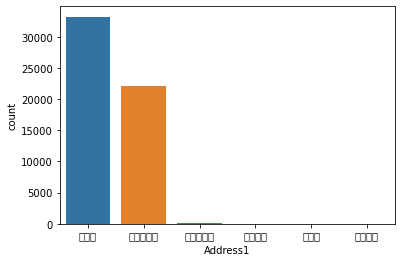

In [4]:
# 여기에 답안코드를 작성하세요.
# seaborn 할 때 그 밑에 matplotlib.pyplot as plt 도 같이 부르세용
# 그리고 plt.show()를 그래프 출력할 때마다 같이 출력해주는게 관행이에여
import seaborn as sns
import matplotlib.pyplot as plt

df = df.loc[df['Address1'] != '-']

# df = df.loc[df['Address1'] == '경기도'] # 경기도만 뽑는 방법

# 2개 이상에 속하는 값 걸러내는 방법
# df = df.loc[(df['Address1']=='경기도')|(df['Address1']=='서울특별시')]  # 서울특별시랑, 경기도만 2개에 속하는거(1)
# df = df.loc[df['Address1'].isin(['경기도','서울특별시'])] # 서울특별시랑, 경기도만 2개에 속하는거 (2) 
 
sns.countplot(df['Address1'])
plt.show()

<br>

### 5. 실주행시간과 평균시속의 분포를 같이 확인하려고 합니다.
### Time_Driving(실주행시간)과 Speed_Per_Hour(평균시속)을 jointplot 그래프로 만드세요.
* Seaborn을 활용하세요.
* X축에는 Time_Driving(실주행시간)을 표시하고 Y축에는 Speed_Per_Hour(평균시속)을 표시하세요.

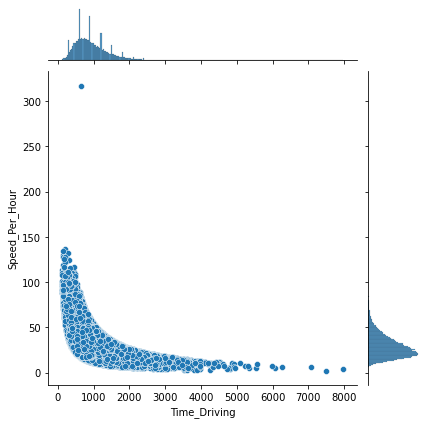

In [5]:
# 여기에 답안코드를 작성하세요.
sns.jointplot(x=df['Time_Driving'], y=df['Speed_Per_Hour'])
plt.show()

<br>

### 6. 위의 jointplot 그래프에서 시속 300이 넘는 이상치를 발견할 수 있습니다.
### jointplot 그래프에서 발견한 이상치 1개를 삭제하세요.
* 대상 데이터프레임: df
* jointplot 그래프를 보고 시속 300 이상되는 이상치를 찾아 해당 행(Row)을 삭제하세요.
* 전처리 반영 후에 새로운 데이터프레임 변수명 df_temp에 저장하세요.

In [86]:
# 여기에 답안코드를 작성하세요.
df_temp = df.loc[df['Speed_Per_Hour'] <= 300] # 이렇게 하면 결측치까지 제거되는 문제가 있음, 왜냐면 결측치는 어떤 숫자랑 비교가 안돼서

In [87]:
df_temp2 = df.loc[ ~(df['Speed_Per_Hour'] > 300) ] # 이렇게 하면 딱 300이상인 값 빼고 결측치포함전부를 살리게 됨 ㅎ

<br>

In [81]:
# 아래 코드는 결측치 개수를 확인하는 방법
df['Speed_Per_Hour'].isnull().sum()

5

In [6]:
# drop 방법을 통해 행 제거하는 방법 : index 번호를 제시해줘야 하고, axis=0으로 해야 해여
df[df['Speed_Per_Hour'] >= 300].index
df_temp =  df.drop(df[df['Speed_Per_Hour'] >= 300].index, axis=0)

### 7. 모델링 성능을 제대로 얻기 위해서 결측치 처리는 필수입니다.
### 아래 가이드를 따라 결측치 처리하세요.
* 대상 데이터프레임: df_temp
* 결측치를 확인하는 코드를 작성하세요.
* 결측치가 있는 행(raw)를 삭제 하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_na에 저장하세요.

In [104]:
df_temp.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          2
Time_Driving      3
Speed_Per_Hour    5
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

In [106]:
df_temp['Time_Driving'].dropna().shape, df_temp.shape

((55437,), (55440, 11))

In [7]:
# 여기에 답안코드를 작성하세요.
df_temp.isnull().sum()
df_na = df_temp.dropna()

In [116]:
df_temp.shape

(55440, 11)

In [120]:
# 이렇게 하면 안돼요! df_temp 길이랑 dropna해서 나온 길이랑 다르니까
df_temp['Time_Driving'] = df_temp['Time_Driving'].dropna()

<br>

### 8. 모델링 성능을 제대로 얻기 위해서 불필요한 변수는 삭제해야 합니다.
### 아래 가이드를 따라 불필요 데이터를 삭제 처리하세요.
* 대상 데이터프레임: df_na
* 'Time_Departure', 'Time_Arrival' 2개 컬럼을 삭제하세요.
* 전처리 반영된 결과를 새로운 데이터프레임 변수명 df_del에 저장하세요.

In [8]:
# 여기에 답안코드를 작성하세요.
df_del = df_na.drop(['Time_Departure','Time_Arrival'], axis=1)

<br>

### 9. 원-핫 인코딩(One-hot encoding)은 범주형 변수를 1과 0의 이진형 벡터로 변환하기 위하여 사용하는 방법입니다.
### 원-핫 인코딩으로 아래 조건에 해당하는 컬럼 데이터를 변환하세요.
* 대상 데이터프레임: df_del
* 원-핫 인코딩 대상: object 타입의 전체 컬럼
* 활용 함수: pandas의 get_dummies
* 해당 전처리가 반영된 결과를 데이터프레임 변수 df_preset에 저장해 주세요.

In [127]:
df_del.head(2)

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,12914.0,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,7483.0,823.817017,32.699980,서울특별시,영등포구,31,0,5,20


In [9]:
df_del.dtypes
df_preset = pd.get_dummies(df_del, columns=['Address1','Address2'])

<br>

### 10. 훈련과 검증 각각에 사용할 데이터셋을 분리하려고 합니다.
### Time_Driving(실주행시간) 컬럼을 label값 y로, 나머지 컬럼을 feature값 X로 할당한 후 훈련데이터셋과 검증데이터셋으로 분리하세요.
* 대상 데이터프레임: df_preset
* 훈련 데이터셋 label: y_train, 훈련 데이터셋 Feature: X_train
* 검증 데이터셋 label: y_valid, 검증 데이터셋 Feature: X_valid
* 훈련 데이터셋과 검증데이터셋 비율은 80:20
* random_state: 42
* Scikit-learn의 train_test_split 함수를 활용하세요.

In [10]:
# 여기에 답안코드를 작성하세요.
y = df_preset['Time_Driving']
X = df_preset.drop(['Time_Driving'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_valid.shape, X.shape

((44344, 89), (11087, 89), (55431, 89))

<br>

### 11. Time_Driving(실주행시간)을 예측하는 머신러닝 모델을 만들려고 합니다.
### 의사결정나무(decision tree)는 여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 모형으로
### 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있습니다.
### 의사결정나무(decision tree)로 학습을 진행하세요.
* 트리의 최대 깊이: 5로 설정
* 노드를 분할하기 위한 최소한의 샘플 데이터수(min_samples_split): 3로 설정
* random_state: 120로 설정

In [15]:
# 여기에 답안코드를 작성하세요.
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth = 5, min_samples_split=3, random_state=120)
dt_model.fit(X_train, y_train) # 학습을 진행하라고 하면 보통 .fit으로 진행하고, 그 안에 학습 데이터 변수를 넣으면 된다.
# 학습할 때는 따로 변수에 저장하는게 아니라 .fit 만 실행하면 알아서 학습하고 그 결과를 dt_model 안에다가 업데이트를 해준다.

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor(max_depth=5)

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [37]:
y_pred = rf.predict(X_valid)

In [38]:
mean_absolute_error(y_valid, y_pred)

78.13704044888865

In [39]:
dt_mae

113.8783856640788

<br>

### 12. 위 의사결정나무(decision tree) 모델의 성능을 평가하려고 합니다.
### 예측 결과의 mae(Mean Absolute Error)를 구하세요.
* 성능 평가는 검증 데이터셋을 활용하세요.
* 11번 문제에서 만든 의사결정나무(decision tree) 모델로 y값을 예측(predict)하여 y_pred에 저장하세요.
* 검증 정답(y_valid)과 예측값(y_pred)의 mae(Mean Absolute Error)를 구하고 dt_mae 변수에 저장하세요.

In [20]:
mean_absolute_error기에 답안코드를 작성하세요.

from sklearn.metrics import mean_absolute_error
y_pred = dt_model.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, y_pred)

In [30]:
y_pred

array([ 582.56231691, 1104.68423406, 1347.14632565, ...,  543.0137019 ,
       1116.81774783,  776.68141061])

In [32]:
y_valid.values

array([ 607.4609985, 1155.812012 , 1260.546021 , ...,  646.9559937,
        952.5930176,  709.6959839])

<br>

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [25]:
!pip install --user tensorflow

  Using cached tensorflow-2.18.0-cp39-cp39-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.18.0-cp39-cp39-win_amd64.whl (390.0 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached ml_dtypes-0.4.1-cp39-cp39-win_amd64.whl (126 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl (30 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached h5py-3.12.1-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-3.8.0-py3-none-any.whl (1.3 MB)
  Using cached termcolor-2.5.0-py3-none-any.whl (7.8 kB)
  Using cached grpcio-1.69.0-cp39-cp39-win_amd64.whl (4.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Us

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

ModuleNotFoundError: No module named 'tensorflow'

<br>

### 13. Time_Driving(실주행시간)을 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [ ]:
# 여기에 답안코드를 작성하세요.

# 딥러닝 모델은 기본이 Sequential() 이거니까 이거를 model이라는 변수에 선언
model = Sequential() 

# 히든 레이어를 2개 이상 하라는 말은 model.add 로 레이어라는 것을 추가하면 된다.
# 그거는 보통 Dense() 라는 것으로 이름이 붙어 있어서 model.add(Dense(~))
# Dense() 안에 input_shape에 X_train 학습 데이터의 정보를 넣어주는데 input_shape안에 X_train.shape[1] 이거를 외우자
# activation relu라는 것은 인공신경망이 학습할 때 어떤 수식으로 학습을 할지 정하는 하이퍼파라미터 중 하나
model.add(Dense(128, input_shape=(X_train.shape[1], ), activation='relu'))

# Dropout 레이어는 이름이 따로 있다 -> Dropout(0.2) 라고 하면 20%씩 중간에 버리도록 해서 신경망을 가볍게 만들어준다 잘 학습할 수 있게 
model.add(Dropout(0.2))

# 하나 더 레이어를 예시로 추가해본 것
model.add(Dense(64, activation='relu'))

# 맨 마지막에는 Dense(1)로 끝내는게 일반적
model.add(Dense(1))

# DecisionTreeRegressor(min_split_samples=3, asdmaois)
model.compile(optimizer='adam', loss='mse', metrics='mse')

# 아래 코드가 실질적으로 학습을 진행시키는 코드
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid))

<br>

### 14. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 mse과 검증 mse 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'mae', 'mse'로 표시하세요.
* 그래프의 타이틀은 'Model MSE'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'MSE'라고 표시하세요.

In [ ]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.legend(['mae', 'mse'])
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

### 머신러닝의 흐름

- 모델을 부른다 : model = DecisionTreeRegressor(min_split_samples=5, max_depth=5, random_state=123)
- 모델에 학습데이터를 넣어서 학습한다 : model.fit(X_train, y_train)
- 그럼 검증용 데이터로 예측해서 실제랑 잘 맞는지는 어떻게 평가? : y_pred = model.predict(X_valid)
- y_pred랑 y_valid(실제 값) 차이를 계산해본다 어떻게? mean_absolute_error(y_pred, y_valid)

### 딥러닝의 흐름

- 모델을 부른다 : model = Sequential()
- 다른점은 레이어를 쌓아줘 : model.add(Dense(128, activation='relu'))
- 중간에 너무 복잡하면 안돼서 Dropout을 쓴다 20%
- 결국 학습방법은 똑같이 model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid))
- 근데 막 부가적인 파라미터가 붙는 이유는 한 번에 학습을 못할 정도로 복잡해서 epoch와 batch라는 작은 단위와 반복횟수로 학습을 진행하게 한다.
- 안그러면 컴퓨터 터진다
- 머신러닝에서는 y_pred = model.predict <- / 딥러닝은 딱히 predict를 쓰긴쓰지만 자체적으로 validation_data = ~ 이걸 넣어주면 알아서 검증까지 해준다.